<a href="https://colab.research.google.com/github/TamaDioo/Pembelajaran-Mesin/blob/main/TG1_2_JS07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jobsheet 7 - Approximate Nearest Neighbors (ANN)

Nama: Dio Andika Pradana Mulia Tama

NIM: 2341720098

Kelas: TI-3F

## Praktikum 1

### Pengantar
Pada percobaan 1 kali ini, kita akan mencoba membandingkan hasil dari exact NN dengan ANNOY. data yang kita buat adalah data random 2D, dengan 1000 data point, mencari 3 data terdekat dari query point, Metric Similarity menggunakan Euclidean, dengan 3 tree Annoy.

### Langkah 1 - Install Library ANNOY

In [ ]:
# Install ANNOY
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551808 sha256=ecc3fc9262ace418618085cee3ffd0c90cd815da540c96e1d045d1b8734926c2
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


### Langkah 2 - Import Library

In [ ]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

### Langkah 3 - Membuat Dataset Dummy
Pada langkah ini Anda akan membuat dataset dummy dan memilih titik awal untuk cluster (query point).

In [ ]:
# Build Random Dataset and Query Point
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # random value at 100x100 space

# Query point (pick 1 random data point)
query = X[np.random.randint(0, n_points)]

### Langkah 4 - Exact NN
Pada langkah ini, Anda akan mengkomputasi jarak terdekat dengan menggunakan metode _brute force_. Perhatikan waktu yang dihasilkan!

In [ ]:
# Compute Exact NN Using Brute Force
# It will visit the data one by one
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 8.6513 ms


### Langkah 5 - Perhitungan Jarak dengan ANNOY
Selanjutnya, bandingkan dengan ANNOY. Jumlah Tree yang digunakan adalah 3.

In [ ]:
# ANNOY 3 Tree
f = 2  # dimensi
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # 3 trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # find 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")


Annoy NN index: [219, 898, 770]
Annoy NN jarak: [np.float64(0.0), np.float64(1.369159376273702), np.float64(2.568167959732514)]
Waktu Annoy: 0.15 ms


Dapat dilihat perbedaan waktu yang sangat signifikan. ANNOY hanya memerlukan waktu `0.15ms` sedangkan NN konvensional mencapai `8.65ms`.

### Langkah 6 - Visualisasi Hasil NN
Untuk mengetahui tingkat ketepatan prediksi NN dari ANNOY, lakukan proses visualisasi sehingga Anda dapat mengetahui titik exact NN dibandingkan dengan perkiraan NN dari ANNOY.

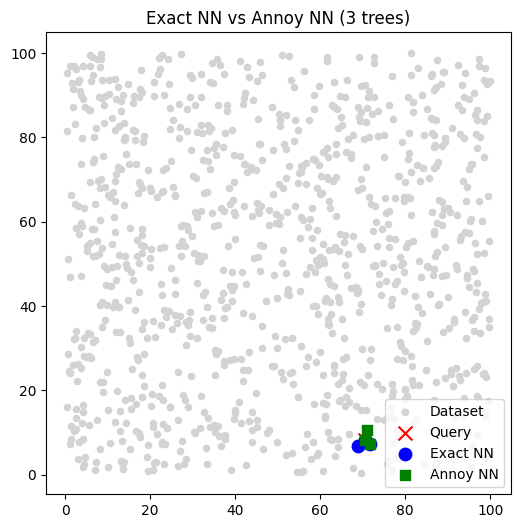

In [ ]:
# Visualize
# Knowing the NN produced by Exact NN and ANNOY
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

Terlihat bahwa ANNOY tidak memilih NN tepat seperti exact NN. Akan tetapi, posisi ini sudah cukup untuk kebutuhan pencarian kedekatan dengan jumlah data yang besar dengan kompensasi waktu yang lebih cepat. Ingat, ___tujuan utama ANNOY adalah mencari titik balance antara akurasi klasterisasi dan kecepatan___.

## Praktikum 2

### Pengantar
Pada percobaan kali ini kita akan membuat pencarian sederhana menggunakan FAISS. Install FAISS terlebih dahulu menggunakan FAISS-CPU, jika ingin menggunakan GPU, dapat lakukan instalasi FAISS-GPU.

### Langah 1 - Instal FAISS

In [ ]:
!pip install faiss-cpu
# !pip install faiss-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 66.0 MB/s eta 0:00:00


### Langkah 2 - Import Library

In [ ]:
import numpy as np
import faiss
import matplotlib.pyplot as plt
import time

### Langkah 3 - Membuat Dummy Dataset

In [ ]:
# Build random data
np.random.seed(42)
X = np.random.rand(1000, 2).astype('float32')  # 1000 data 2D
query = np.array([[0.5, 0.5]], dtype='float32')  # query point

### Langkah 4 - Buat Model Exact NN

In [ ]:
# Search NN using Exact NN
index_flat = faiss.IndexFlatL2(2)   # L2 = Euclidean distance
index_flat.add(X)

# Compute Exact NN Time
start = time.time()
D_flat, I_flat = index_flat.search(query, 3)  # Find 3 NN
end = time.time()
time_flat = end - start

### Langkah 5 - Buat Model FAISS

In [ ]:
# Compute FAISS
nlist = 10   # n-cluster (inverted list)
m = 2        # number of subvector
quantizer = faiss.IndexFlatL2(2)   # used by IVF for initiatl cluster
index_ivfpq = faiss.IndexIVFPQ(quantizer, 2, nlist, m, 8)  # 8 bit per subvector

index_ivfpq.train(X)  # training centroid
index_ivfpq.add(X)

start = time.time()
D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)
end = time.time()
time_ivfpq = end - start

### Langkah 6 - Cek Hasil Performa

In [ ]:
# Print The Peformances
print("Exact NN (Flat) indices:", I_flat, "distances:", D_flat)
print("IVF+PQ indices:", I_ivfpq, "distances:", D_ivfpq)
print("Waktu Exact:", time_flat)
print("Waktu IVF+PQ:", time_ivfpq)

Exact NN (Flat) indices: [[137 170 750]] distances: [[0.00013095 0.00077404 0.00079751]]
IVF+PQ indices: [[137 170 750]] distances: [[0.00012945 0.00079226 0.00080067]]
Waktu Exact: 0.0003554821014404297
Waktu IVF+PQ: 0.0001685619354248047


FAISS dapat mengungguli exact NN dengan nilai yang tipis. Namun ingat, kita belum mencoba dengan data yang lebih besar. Data dummy yang digunakan hanya `1000x1000`.

### Langkah 7 - Visualisasi
Untuk lebih jelas mengetahui perkiraan NN yang dibuat oleh FAISS, Anda dapat melakukan visualisasi.

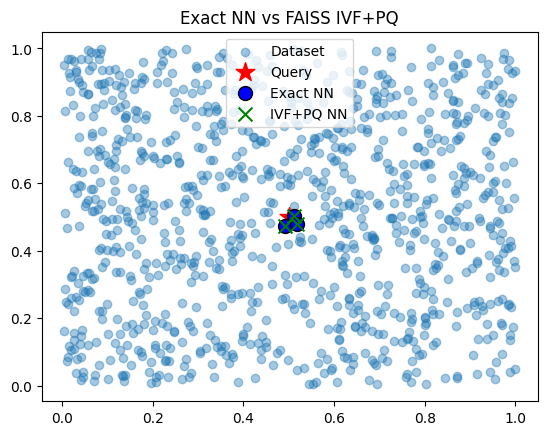

In [ ]:
# Visualize
plt.scatter(X[:,0], X[:,1], alpha=0.4, label="Dataset")
plt.scatter(query[:,0], query[:,1], c='red', marker='*', s=200, label="Query")

# Flat NN -> Exact NN
plt.scatter(X[I_flat[0],0], X[I_flat[0],1], c='blue', s=100, edgecolor='k', label="Exact NN")

# IVF+PQ NN -> FAISS
plt.scatter(X[I_ivfpq[0],0], X[I_ivfpq[0],1], c='green', marker='x', s=100, label="IVF+PQ NN")

plt.legend()
plt.title("Exact NN vs FAISS IVF+PQ")
plt.show()

## Praktikum 3

### Pengantar
Pada praktikum ini, kita akan melakukan hal yang sama dengan praktikum sebelumnya. Akan tetapi, kali ini kita akan membandingkan exact NN dengan HNSW.

### Langkah 1 - Instal Library

In [ ]:
!pip install hnswlib

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hnswlib: filename=hnswlib-0.8.0-cp312-cp312-linux_x86_64.whl size=2528146 sha256=cb44e00cddd085857ac9cfdc66b2d7282d109052fca69f3a9e8583ae1d9d45f0
  Stored in directory: /root/.cache/pip/wheels/ac/39/b3/cbd7f9cbb76501d2d5fbc84956e70d0b94e788aac87bda465e
Successfully built hnswlib


### Langkah 2 - Import Library

In [ ]:
import hnswlib
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors

### Langkah 3 - Buat Dataset Dummy

In [ ]:
# Build Dummy Dataset
num_elements = 1000
dim = 2
data = np.random.random((num_elements, dim)).astype(np.float32)

# Query point
query = np.array([[0.5, 0.5]], dtype=np.float32)
k = 5  # cari 5 tetangga terdekat

### Langkah 4 - Buat Model NN

In [ ]:
# Build NN Model
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(data)

# Compute time performace
start = time.time()
distances, indices = nn.kneighbors(query)
end = time.time()

print("=== Exact NN ===")
print("Indices:", indices)
print("Distances:", distances)
print("Waktu:", end - start, "s")

=== Exact NN ===
Indices: [[830 247 473 913 592]]
Distances: [[0.00993625 0.01363944 0.01646171 0.03779694 0.03859071]]
Waktu: 0.04833698272705078 s


### Langkah 5 - Buat Model HNSW

In [ ]:
# Initiate Index
p = hnswlib.Index(space='l2', dim=dim)

# Define Max Elements
p.init_index(max_elements=num_elements, ef_construction=100, M=16)

# Add Data
p.add_items(data)

# Set searching parameter
p.set_ef(50)   # tradeoff speed vs accuracy

start = time.time()
labels, distances = p.knn_query(query, k=k)
end = time.time()

print("\n=== HNSW ===")
print("Indices:", labels)
print("Distances:", distances)
print("Waktu:", end - start, "s")


=== HNSW ===
Indices: [[830 247 473 913 592]]
Distances: [[9.8728990e-05 1.8603441e-04 2.7098786e-04 1.4286089e-03 1.4892431e-03]]
Waktu: 0.00016498565673828125 s


## Praktikum 4

Percobaan kali ini kita akan melihat perbedaan ketiga model yang telah kita bahas dan bandingkan hasilnya.

In [ ]:
import numpy as np
import time
from annoy import AnnoyIndex
import faiss
import hnswlib

# ===============================
# Build 1mio rows with 5D
# ===============================
n_data = 1_000_000   # try 100_000 if you have limited memory
dim = 5
X = np.random.random((n_data, dim)).astype(np.float32)

# Query point
query = np.random.random((1, dim)).astype(np.float32)
k = 10

# ===============================
# 2. Annoy
# ===============================
print("=== Annoy ===")
ann_index = AnnoyIndex(dim, 'euclidean')

start = time.time()
for i in range(n_data):
    ann_index.add_item(i, X[i])
ann_index.build(10)  # 10 trees
build_time = time.time() - start

start = time.time()
neighbors = ann_index.get_nns_by_vector(query[0], k, include_distances=True)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", neighbors[0][:5], "...")

# ===============================
# 3. FAISS (Flat Index)
# ===============================
print("\n=== FAISS (IndexFlatL2) ===")
faiss_index = faiss.IndexFlatL2(dim)

start = time.time()
faiss_index.add(X)
build_time = time.time() - start

start = time.time()
distances, indices = faiss_index.search(query, k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", indices[0][:5], "...")

# ===============================
# 4. HNSW (hnswlib)
# ===============================
print("\n=== HNSW (hnswlib) ===")
hnsw_index = hnswlib.Index(space='l2', dim=dim)

start = time.time()
hnsw_index.init_index(max_elements=n_data, ef_construction=200, M=16)
hnsw_index.add_items(X)
build_time = time.time() - start

hnsw_index.set_ef(50)

start = time.time()
labels, distances = hnsw_index.knn_query(query, k=k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", labels[0][:5], "...")

=== Annoy ===
Build time: 21.86264443397522 detik
Query time: 0.00032711029052734375 detik
Neighbors: [129179, 559276, 630783, 213191, 559393] ...

=== FAISS (IndexFlatL2) ===
Build time: 0.015589237213134766 detik
Query time: 0.006307840347290039 detik
Neighbors: [129179 559276 630783 213191 559393] ...

=== HNSW (hnswlib) ===
Build time: 163.3043463230133 detik
Query time: 0.00040268898010253906 detik
Neighbors: [129179 559276 630783 213191 559393] ...


## Praktikum 5

Untuk membandingkan ANN, biasanya menggunakan metrics Recall Query (berapa banyak nearest neighbors yang ditemukan dengan benar) dan diplot dalam bentuk grafik untuk dapat memudahkan melihat perbedaannya. Salah satu repo yang sering digunakan adalah ANN Benchmark https://github.com/erikbern/ann-benchmarks

Penggunaan Repository ann benchmark memerlukan docker agar dapat dijalankan dengan baik. sayangnya Google Colab belum dilengkapi dengan docker, sehingga kita akan mencoba memvisualisasikan dengan grafik sederhana saja yang akan memberikan hasil yang mirip dengan ann benchmark.

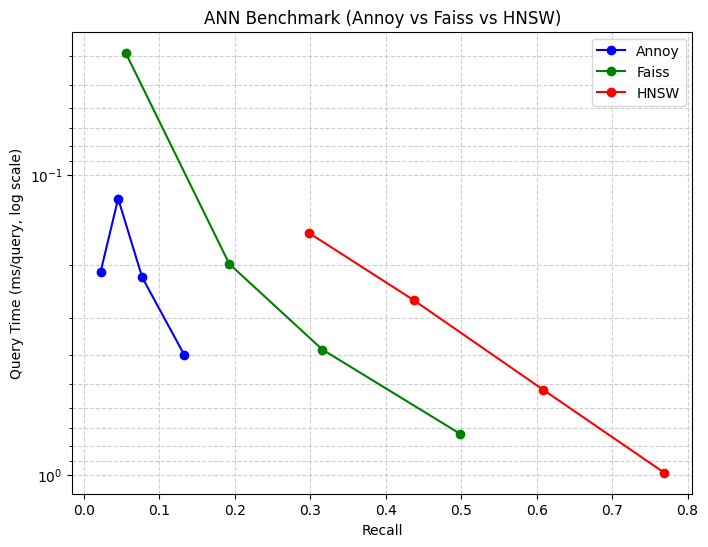

In [ ]:
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
import matplotlib.pyplot as plt

# -------------------------------
# Dataset random
# -------------------------------
d = 128        # dimensi
nb = 100000    # jumlah database vector
nq = 1000      # jumlah query

np.random.seed(42)
xb = np.random.random((nb, d)).astype('float32')
xq = np.random.random((nq, d)).astype('float32')

# -------------------------------
# Ground truth dengan FAISS brute force
# -------------------------------
index_flat = faiss.IndexFlatL2(d)
index_flat.add(xb)
k = 10
_, gt_idx = index_flat.search(xq, k)

# -------------------------------
# Fungsi recall
# -------------------------------
def recall_at_k(I_pred, I_gt, k):
    correct = 0
    for i in range(len(I_pred)):
        correct += len(set(I_pred[i][:k]) & set(I_gt[i][:k]))
    return correct / (len(I_pred) * k)

# -------------------------------
# Benchmark Annoy
# -------------------------------
def run_annoy(xb, xq, n_trees=10, search_k=1000, k=10):
    f = xb.shape[1]
    index = AnnoyIndex(f, 'euclidean')
    for i, v in enumerate(xb):
        index.add_item(i, v)
    index.build(n_trees)

    start = time.time()
    I = [index.get_nns_by_vector(v, k, search_k=search_k) for v in xq]
    elapsed = (time.time() - start) * 1000 / len(xq)  # ms/query
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark FAISS IVF
# -------------------------------
def run_faiss(xb, xq, nlist=100, nprobe=10, k=10):
    quantizer = faiss.IndexFlatL2(d)
    index = faiss.IndexIVFFlat(quantizer, d, nlist, faiss.METRIC_L2)
    index.train(xb)
    index.add(xb)

    index.nprobe = nprobe
    start = time.time()
    _, I = index.search(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark HNSW
# -------------------------------
def run_hnsw(xb, xq, ef=100, M=16, k=10):
    num_elements = xb.shape[0]
    p = hnswlib.Index(space='l2', dim=d)
    p.init_index(max_elements=num_elements, ef_construction=200, M=M)
    p.add_items(xb)
    p.set_ef(ef)

    start = time.time()
    I, _ = p.knn_query(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Jalankan benchmark dengan beberapa parameter
# -------------------------------
results = {"Annoy": [], "Faiss": [], "HNSW": []}

# Annoy
for sk in [200, 500, 1000, 2000]:
    rec, t = run_annoy(xb, xq, n_trees=10, search_k=sk)
    results["Annoy"].append((rec, t))

# FAISS
for npb in [1, 5, 10, 20]:
    rec, t = run_faiss(xb, xq, nlist=100, nprobe=npb)
    results["Faiss"].append((rec, t))

# HNSW
for ef in [50, 100, 200, 400]:
    rec, t = run_hnsw(xb, xq, ef=ef)
    results["HNSW"].append((rec, t))

# -------------------------------
# Visualisasi trade-off
# -------------------------------
plt.figure(figsize=(8,6))
for label, color in zip(results.keys(), ["blue","green","red"]):
    recall, qtime = zip(*results[label])
    plt.plot(recall, qtime, marker="o", label=label, color=color)

plt.xlabel("Recall")
plt.ylabel("Query Time (ms/query, log scale)")
plt.yscale("log")
plt.gca().invert_yaxis()  # invert Y, makin kanan makin turun
plt.title("ANN Benchmark (Annoy vs Faiss vs HNSW)")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.show()

# Tugas 1
Lakukan percobaan pada metric distance yang berbeda, 1000 vs 1.000.000 data, 2D vs 5D data, untuk algoritma, <br>
a. ANNOY <br>
b. FAISS <br>
c. HNSW <br>
Catat performansinya dalam bentuk tabel, misal

In [ ]:
import numpy as np
import pandas as pd
import time
import annoy
import faiss
import hnswlib

def run_experiment(n_data, dim, metric='euclidean', k=10):
    """
    Menjalankan satu skenario eksperimen ANN.
    """
    print(f"--- Menjalankan: {n_data} data, {dim}D, metrik: {metric} ---")

    X = np.random.random((n_data, dim)).astype(np.float32)
    query = np.random.random((1, dim)).astype(np.float32)

    # Untuk metrik angular/cosine, normalisasi vektor
    if metric == 'angular':
        faiss.normalize_L2(X)
        faiss.normalize_L2(query)

    results = {
        'Scenario': f"{n_data} data, {dim}D, {metric}"
    }

    # --- ANNOY ---
    try:
        ann_index = annoy.AnnoyIndex(dim, metric)
        start = time.time()
        for i in range(n_data):
            ann_index.add_item(i, X[i])
        ann_index.build(10) # 10 trees
        results['ANNOY Build Time'] = time.time() - start

        start = time.time()
        ann_index.get_nns_by_vector(query[0], k)
        results['ANNOY Query Time'] = time.time() - start
    except Exception as e:
        print(f"ANNOY Error: {e}")
        results['ANNOY Build Time'] = -1
        results['ANNOY Query Time'] = -1


    # --- FAISS ---
    try:
        if metric == 'euclidean':
            faiss_index = faiss.IndexFlatL2(dim)
        elif metric == 'angular':
            faiss_index = faiss.IndexFlatIP(dim) # Inner Product for Cosine Similarity

        start = time.time()
        faiss_index.add(X)
        results['FAISS Build Time'] = time.time() - start

        start = time.time()
        faiss_index.search(query, k)
        results['FAISS Query Time'] = time.time() - start
    except Exception as e:
        print(f"FAISS Error: {e}")
        results['FAISS Build Time'] = -1
        results['FAISS Query Time'] = -1

    # --- HNSW ---
    try:
        space = 'l2' if metric == 'euclidean' else 'ip'
        hnsw_index = hnswlib.Index(space=space, dim=dim)

        start = time.time()
        hnsw_index.init_index(max_elements=n_data, ef_construction=200, M=16)
        hnsw_index.add_items(X)
        results['HNSW Build Time'] = time.time() - start

        start = time.time()
        hnsw_index.knn_query(query, k=k)
        results['HNSW Query Time'] = time.time() - start
    except Exception as e:
        print(f"HNSW Error: {e}")
        results['HNSW Build Time'] = -1
        results['HNSW Query Time'] = -1

    print("Selesai.")
    return results

# ======================================================
# Menjalankan Semua Skenario Percobaan
# ======================================================
scenarios = [
    # 1000 data
    {'n_data': 1000, 'dim': 2, 'metric': 'euclidean'},
    {'n_data': 1000, 'dim': 5, 'metric': 'euclidean'},
    {'n_data': 1000, 'dim': 5, 'metric': 'angular'},
    # 1000000 data
    {'n_data': 1_000_000, 'dim': 2, 'metric': 'euclidean'},
    {'n_data': 1_000_000, 'dim': 5, 'metric': 'euclidean'},
    {'n_data': 1_000_000, 'dim': 5, 'metric': 'angular'},
]

experiment_results = []
for params in scenarios:
    result = run_experiment(**params)
    experiment_results.append(result)

# Tampilkan hasil dalam DataFrame pandas
df_results = pd.DataFrame(experiment_results)
print("\n\n--- HASIL AKHIR EKSPERIMEN (dalam detik) ---")
df_results

--- Menjalankan: 1000 data, 2D, metrik: euclidean ---
Selesai.
--- Menjalankan: 1000 data, 5D, metrik: euclidean ---
Selesai.
--- Menjalankan: 1000 data, 5D, metrik: angular ---
Selesai.
--- Menjalankan: 1000000 data, 2D, metrik: euclidean ---
Selesai.
--- Menjalankan: 1000000 data, 5D, metrik: euclidean ---
Selesai.
--- Menjalankan: 1000000 data, 5D, metrik: angular ---
Selesai.


--- HASIL AKHIR EKSPERIMEN (dalam detik) ---


,Scenario,ANNOY Build Time,ANNOY Query Time,FAISS Build Time,FAISS Query Time,HNSW Build Time,HNSW Query Time
0,"1000 data, 2D, euclidean",0.033883,0.000059,0.000048,0.000050,0.047648,0.000055
1,"1000 data, 5D, euclidean",0.015766,0.000062,0.000043,0.000053,0.054750,0.000052
2,"1000 data, 5D, angular",0.019204,0.000064,0.000033,0.000037,0.057309,0.000059
3,"1000000 data, 2D, euclidean",27.623894,0.000098,0.003063,0.005629,105.041671,0.000078
4,"1000000 data, 5D, euclidean",21.359106,0.000121,0.018828,0.012104,166.611428,0.000087
5,"1000000 data, 5D, angular",27.502968,0.000098,0.009034,0.006920,170.528437,0.000380


# Tugas 2
Lakukan percobaan penggunaan ANNOY, FAISS, dan HNSWLIB pada dataset sekunder berukuran besar (Micro Spotify) pada link berikut: https://www.kaggle.com/datasets/bwandowandospotify-songs-with-attributes-and-lyrics/data .
- Download data dan load CSV filenya (pilih dataset yg pertama dari dua dataset).
- Pilih hanya fitur numerik saja, dan lakukan normalisasi menggunakan StandardScaler.
- Lakukan pencarian track terdekat dan bandingkan hasilnya.
- Lakkan perbandingan pada exact NN, ANNOY, FAISS, dan HNSW

## Boilerplate
Berikut kode dasar yang dapat Anda manfaatkan.


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# -------------------------------
# Load dataset
# -------------------------------
df = pd.read_csv('/content/drive/My Drive/dataset/songs_with_attributes_and_lyrics.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955320 entries, 0 to 955319
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                955320 non-null  object 
 1   name              955309 non-null  object 
 2   album_name        385557 non-null  object 
 3   artists           955318 non-null  object 
 4   danceability      955320 non-null  float64
 5   energy            955320 non-null  float64
 6   key               955320 non-null  object 
 7   loudness          955320 non-null  float64
 8   mode              955320 non-null  object 
 9   speechiness       955320 non-null  float64
 10  acousticness      955320 non-null  float64
 11  instrumentalness  955320 non-null  float64
 12  liveness          955320 non-null  float64
 13  valence           955320 non-null  float64
 14  tempo             955320 non-null  float64
 15  duration_ms       955320 non-null  float64
 16  lyrics            95

In [ ]:
features = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Drop baris dengan missing values sebelum diubah ke numpy array
df_clean = df.dropna(subset=features).reset_index(drop=True)
X = df_clean[features].values

df_info = df_clean[['name', 'artists']]

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_data, dim = X_scaled.shape
k = 10  # jumlah nearest neighbors

# Buat query point (menggunakan point data pertama)
query_idx = 0
query = X_scaled[query_idx].reshape(1, -1)


# -------------------------------
# Implementasi dan Benchmark Metode ANN
# -------------------------------

results = {}

# Exact NN menggunakan scikit-learn
print("--- Menjalankan Exact NN ---")
start_time = time.time()
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(X_scaled)
build_time_exact = time.time() - start_time

start_time = time.time()
distances_exact, indices_exact = nn.kneighbors(query)
query_time_exact = time.time() - start_time

results['Exact NN'] = {
    'Build Time (s)': build_time_exact,
    'Query Time (s)': query_time_exact,
    'Recall': 1.0 # Exact NN mempunyai recall yang sempurna by definisi
}
print("Exact NN Selesai.")

# Annoy
print("--- Menjalankan ANNOY ---")
try:
    ann_index = AnnoyIndex(dim, 'euclidean')
    start_time = time.time()
    for i in range(n_data):
        ann_index.add_item(i, X_scaled[i])
    ann_index.build(10) # 10 trees
    build_time_annoy = time.time() - start_time

    start_time = time.time()
    neighbors_annoy = ann_index.get_nns_by_vector(query[0], k)
    query_time_annoy = time.time() - start_time

    # Hitung Recall untuk Annoy
    correct_annoy = len(set(neighbors_annoy) & set(indices_exact[0]))
    recall_annoy = correct_annoy / k

    results['ANNOY'] = {
        'Build Time (s)': build_time_annoy,
        'Query Time (s)': query_time_annoy,
        'Recall': recall_annoy
    }
    print("ANNOY Selesai.")
except Exception as e:
    print(f"ANNOY Error: {e}")
    results['ANNOY'] = {'Build Time (s)': -1, 'Query Time (s)': -1, 'Recall': -1}


# FAISS
print("--- Menjalankan FAISS ---")
try:
    faiss_index = faiss.IndexFlatL2(dim)

    start_time = time.time()
    faiss_index.add(X_scaled)
    build_time_faiss = time.time() - start_time

    start_time = time.time()
    distances_faiss, indices_faiss = faiss_index.search(query, k)
    query_time_faiss = time.time() - start_time

    # Hitung Recall untuk FAISS
    correct_faiss = len(set(indices_faiss[0]) & set(indices_exact[0]))
    recall_faiss = correct_faiss / k


    results['FAISS'] = {
        'Build Time (s)': build_time_faiss,
        'Query Time (s)': query_time_faiss,
        'Recall': recall_faiss
    }
    print("FAISS Selesai.")

except Exception as e:
    print(f"FAISS Error: {e}")
    results['FAISS'] = {'Build Time (s)': -1, 'Query Time (s)': -1, 'Recall': -1}


# HNSW (hnswlib)
print("--- Menjalankan HNSWLIB ---")
try:
    hnsw_index = hnswlib.Index(space='l2', dim=dim)

    start_time = time.time()
    hnsw_index.init_index(max_elements=n_data, ef_construction=200, M=16)
    hnsw_index.add_items(X_scaled)
    build_time_hnsw = time.time() - start_time

    # ef penting untuk kecepatan query dan akurasi
    hnsw_index.set_ef(50)

    start_time = time.time()
    labels_hnsw, distances_hnsw = hnsw_index.knn_query(query, k=k)
    query_time_hnsw = time.time() - start_time

    # Hitung Recall untuk HNSWLIB
    correct_hnsw = len(set(labels_hnsw[0]) & set(indices_exact[0]))
    recall_hnsw = correct_hnsw / k

    results['HNSWLIB'] = {
        'Build Time (s)': build_time_hnsw,
        'Query Time (s)': query_time_hnsw,
        'Recall': recall_hnsw
    }
    print("HNSWLIB Selesai.")

except Exception as e:
    print(f"HNSWLIB Error: {e}")
    results['HNSWLIB'] = {'Build Time (s)': -1, 'Query Time (s)': -1, 'Recall': -1}


# -------------------------------
# Tampilkan Hasil
# -------------------------------
df_results = pd.DataFrame.from_dict(results, orient='index')
print("\nHasil Perbandingan ANN pada Dataset Micro Spotify")
display(df_results)


# -------------------------------
# Tampilkan nearest neighbors yang ditemukan oleh setiap metode
# -------------------------------
print("\nNearest Neighbors Indices")
print("Query Point (Indeks dalam data asli):", df_clean.iloc[query_idx][['name', 'artists']].to_dict())
print("\nExact NN Indices:", indices_exact[0])
if 'ANNOY' in results and results['ANNOY']['Build Time (s)'] != -1:
    print("ANNOY Indices:", neighbors_annoy)
if 'FAISS' in results and results['FAISS']['Build Time (s)'] != -1:
     print("FAISS Indices:", indices_faiss[0])
if 'HNSWLIB' in results and results['HNSWLIB']['Build Time (s)'] != -1:
    print("HNSWLIB Indices:", labels_hnsw[0])

print("\nHasil Exact Nearest Neighbors:")
display(df_clean.iloc[indices_exact[0]][['name', 'artists', 'danceability', 'energy']])

if 'ANNOY' in results and results['ANNOY']['Recall'] != -1:
    print("\nHasil ANNOY:")
    display(df_info.iloc[neighbors_annoy])

if 'FAISS' in results and results['FAISS']['Recall'] != -1:
    print("\nHasil FAISS:")
    display(df_info.iloc[indices_faiss[0]])

if 'HNSWLIB' in results and results['HNSWLIB']['Recall'] != -1:
    print("\nHasil HNSWLIB:")
    display(df_info.iloc[labels_hnsw[0]])

--- Menjalankan Exact NN ---
Exact NN Selesai.
--- Menjalankan ANNOY ---
ANNOY Selesai.
--- Menjalankan FAISS ---
FAISS Selesai.
--- Menjalankan HNSWLIB ---
HNSWLIB Selesai.

Hasil Perbandingan ANN pada Dataset Micro Spotify


,Build Time (s),Query Time (s),Recall
Exact NN,0.051539,0.053318,1.0
ANNOY,20.808865,0.000221,0.8
FAISS,0.062154,0.014292,1.0
HNSWLIB,193.961688,0.000171,1.0



Nearest Neighbors Indices
Query Point (Indeks dalam data asli): {'name': '!', 'artists': "['HELLYEAH']"}

Exact NN Indices: [     0 394553 764272 837727 749223  61511 625227 833164 676733 523698]
ANNOY Indices: [0, 764272, 837727, 749223, 61511, 833164, 676733, 523698, 763625, 256217]
FAISS Indices: [     0 394553 764272 837727 749223  61511 625227 833164 676733 523698]
HNSWLIB Indices: [     0 394553 764272 837727 749223  61511 625227 833164 676733 523698]

Hasil Exact Nearest Neighbors:


,name,artists,danceability,energy
0,!,['HELLYEAH'],0.415,0.605
394553,Intro (Who The Fuck Are You'),['C-Lekktor'],0.486,0.617
764272,Testimonium,['Lacrimosa'],0.430,0.573
837727,Ultimate Satisfaction - The Field Remix,Bear In Heaven,0.412,0.723
749223,Sæglópur,['Sigur Rós'],0.351,0.609
61511,Autumn Interlude,Amethystium,0.505,0.625
625227,Púrpura,['Margaritas Podridas'],0.373,0.696
833164,Turn from Heaven,Therion,0.484,0.645
676733,See You When I Die,BOYO,0.394,0.492
523698,Mrityu,Multani;Karun;Udbhav,0.449,0.559



Hasil ANNOY:


,name,artists
0,!,['HELLYEAH']
764272,Testimonium,['Lacrimosa']
837727,Ultimate Satisfaction - The Field Remix,Bear In Heaven
749223,Sæglópur,['Sigur Rós']
61511,Autumn Interlude,Amethystium
833164,Turn from Heaven,Therion
676733,See You When I Die,BOYO
523698,Mrityu,Multani;Karun;Udbhav
763625,Teri Yaadon Se - Lofi Flip,Jammy Weirdo;Mustafa Zahid;Pranay.M. Rijia
256217,Feed the Fire,Spiral Drive



Hasil FAISS:


,name,artists
0,!,['HELLYEAH']
394553,Intro (Who The Fuck Are You'),['C-Lekktor']
764272,Testimonium,['Lacrimosa']
837727,Ultimate Satisfaction - The Field Remix,Bear In Heaven
749223,Sæglópur,['Sigur Rós']
61511,Autumn Interlude,Amethystium
625227,Púrpura,['Margaritas Podridas']
833164,Turn from Heaven,Therion
676733,See You When I Die,BOYO
523698,Mrityu,Multani;Karun;Udbhav



Hasil HNSWLIB:


,name,artists
0,!,['HELLYEAH']
394553,Intro (Who The Fuck Are You'),['C-Lekktor']
764272,Testimonium,['Lacrimosa']
837727,Ultimate Satisfaction - The Field Remix,Bear In Heaven
749223,Sæglópur,['Sigur Rós']
61511,Autumn Interlude,Amethystium
625227,Púrpura,['Margaritas Podridas']
833164,Turn from Heaven,Therion
676733,See You When I Die,BOYO
523698,Mrityu,Multani;Karun;Udbhav


Perbandingan pada exact NN, ANNOY, FAISS, dan HNSW (ANN Benchmark)

Ukuran basis data (xb): 954320 lagu
Ukuran data kueri (xq): 1000 lagu
Dimensi fitur: 9

Menjalankan benchmark...
Benchmark selesai.


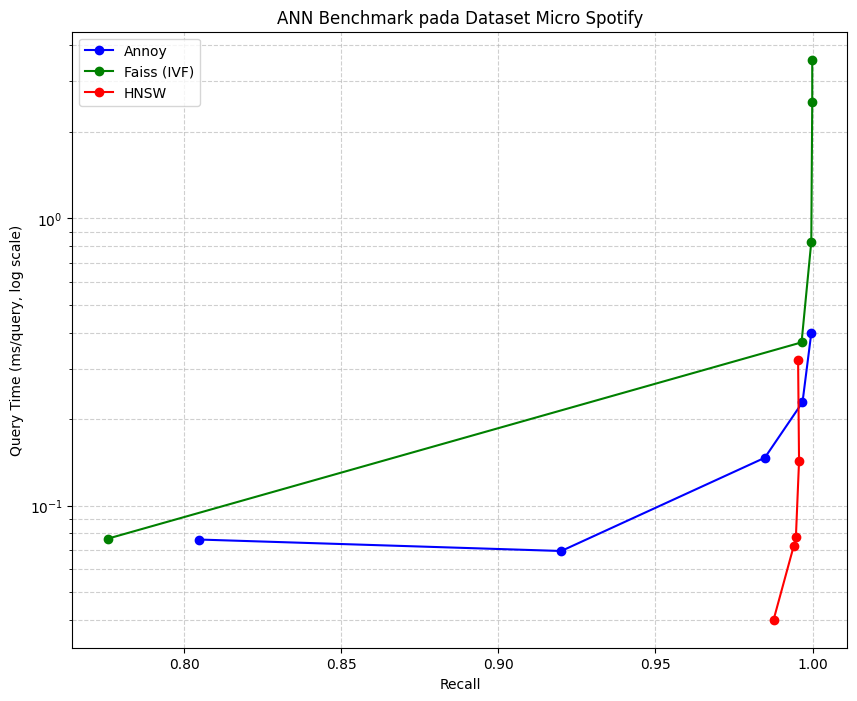

In [ ]:
# Pisahkan data menjadi basis data (xb) dan data kueri (xq)
n_query = 1000
xb = X_scaled[:-n_query]
xq = X_scaled[-n_query:]
nb, d = xb.shape
nq, _ = xq.shape

print(f"Ukuran basis data (xb): {nb} lagu")
print(f"Ukuran data kueri (xq): {nq} lagu")
print(f"Dimensi fitur: {d}")

# Hitung Ground Truth
index_flat = faiss.IndexFlatL2(d)
index_flat.add(xb)
_, gt_idx = index_flat.search(xq, k)

# Fungsi Benchmark
def recall_at_k(I_pred, I_gt, k):
    correct = 0
    for i in range(len(I_pred)):
        correct += len(set(I_pred[i][:k]) & set(I_gt[i][:k]))
    return correct / (len(I_pred) * k)

def run_annoy(xb, xq, n_trees=10, search_k=1000, k=10):
    f = xb.shape[1]
    index = AnnoyIndex(f, 'euclidean')
    for i, v in enumerate(xb):
        index.add_item(i, v)
    index.build(n_trees)
    start = time.time()
    I = [index.get_nns_by_vector(v, k, search_k=search_k) for v in xq]
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

def run_faiss_ivf(xb, xq, nlist=100, nprobe=10, k=10):
    quantizer = faiss.IndexFlatL2(d)
    index = faiss.IndexIVFFlat(quantizer, d, nlist, faiss.METRIC_L2)
    index.train(xb)
    index.add(xb)
    index.nprobe = nprobe
    start = time.time()
    _, I = index.search(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

def run_hnsw(xb, xq, ef=100, M=16, k=10):
    num_elements = xb.shape[0]
    p = hnswlib.Index(space='l2', dim=d)
    p.init_index(max_elements=num_elements, ef_construction=200, M=M)
    p.add_items(xb)
    p.set_ef(ef)
    start = time.time()
    I, _ = p.knn_query(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# Run Benchmark
results = {"Annoy": [], "Faiss (IVF)": [], "HNSW": []}
print("\nMenjalankan benchmark...")

# Annoy
for sk in [100, 200, 500, 1000, 2000]:
    rec, t = run_annoy(xb, xq, search_k=sk)
    results["Annoy"].append((rec, t))

# FAISS
for npb in [1, 5, 10, 20, 50]:
    rec, t = run_faiss_ivf(xb, xq, nprobe=npb)
    results["Faiss (IVF)"].append((rec, t))

# HNSW
for ef in [20, 50, 100, 200, 400]:
    rec, t = run_hnsw(xb, xq, ef=ef)
    results["HNSW"].append((rec, t))

print("Benchmark selesai.")

# Visualisasi Hasil
plt.figure(figsize=(10, 8))
for label, color in zip(results.keys(), ["blue", "green", "red"]):
    recall, qtime = zip(*results[label])
    plt.plot(recall, qtime, marker="o", label=label, color=color)

plt.xlabel("Recall")
plt.ylabel("Query Time (ms/query, log scale)")
plt.yscale("log")
plt.title("ANN Benchmark pada Dataset Micro Spotify")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.show()